In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"


In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
# Combine the data into a single dataset

mouse_clinical_combined = pd.merge(clinical_data, mouse_data, how='left', on= 'Mouse ID')

In [5]:
# Display the data table for preview
mouse_clinical_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean = mouse_clinical_combined.groupby(['Drug', 'Timepoint'], 
                                                         as_index=False)['Tumor Volume (mm3)'].mean()

In [7]:
# Convert to DataFrame
tumor_mean=pd.DataFrame(mean)

In [8]:
# Preview DataFrame
tumor_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem = mouse_clinical_combined.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()


In [10]:
# Convert to DataFrame

tumor_sem=pd.DataFrame(sem).reset_index()

In [11]:
# Preview DataFrame

tumor_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [12]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_reformat=tumor_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')


# Preview that Reformatting worked
tumor_mean_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [13]:
#x-axis values
timepoint=tumor_mean_reformat.index
timepoint

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

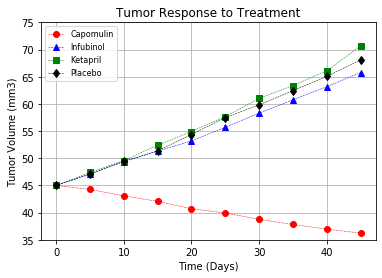

In [14]:
# Generate the Plot (with Error Bars)
plt.errorbar(timepoint,tumor_mean_reformat['Capomulin'],marker='o',color='red',label="Capomulin",linestyle='--', linewidth=0.5)
plt.errorbar(timepoint,tumor_mean_reformat['Infubinol'],marker='^',color='blue',label="Infubinol",linestyle='--', linewidth=0.5)
plt.errorbar(timepoint,tumor_mean_reformat['Ketapril'],marker='s',color='green',label="Ketapril",linestyle='--', linewidth=0.5)
plt.errorbar(timepoint,tumor_mean_reformat['Placebo'],marker='d',color='black',label="Placebo",linestyle='--', linewidth=0.5)


plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upperleft",prop={'size':8})
plt.ylim(35,75)
plt.grid()

# Save the Figure
plt.savefig('tumor_response_treatment.png')

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean = mouse_clinical_combined.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
metastatic_mean_df=pd.DataFrame(metastatic_mean)

# Preview DataFrame
metastatic_mean_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [16]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem = mouse_clinical_combined.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
metastatic_sem_df=pd.DataFrame(metastatic_sem)


# Preview DataFrame
metastatic_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [17]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean_df2=pd.DataFrame(metastatic_mean).reset_index()
metastatic_mean_df2.head()

metastatic_reformat=metastatic_mean_df2.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
metastatic_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


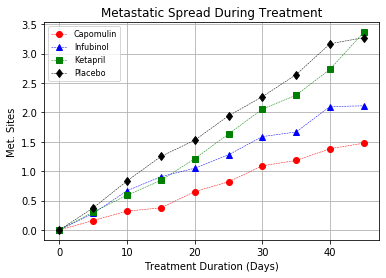

In [18]:
# Generate the Plot (with Error Bars)
plt.errorbar(timepoint,metastatic_reformat['Capomulin'],marker='o',color='red',label="Capomulin",linestyle='--', linewidth=0.5)
plt.errorbar(timepoint,metastatic_reformat['Infubinol'],marker='^',color='blue',label="Infubinol",linestyle='--', linewidth=0.5)
plt.errorbar(timepoint,metastatic_reformat['Ketapril'],marker='s',color='green',label="Ketapril",linestyle='--', linewidth=0.5)
plt.errorbar(timepoint,metastatic_reformat['Placebo'],marker='d',color='black',label="Placebo",linestyle='--', linewidth=0.5)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="upperleft",prop={'size':8})

plt.grid()

# Save the Figure
plt.savefig('metastatic_spread.png')


# Show the Figure
plt.show()

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = mouse_clinical_combined.groupby(['Drug', 'Timepoint'],as_index=False)['Mouse ID'].count()

# Convert to DataFrame
mouse_df=pd.DataFrame(mouse_count)

# Preview DataFrame
mouse_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames
mouse_reformat=mouse_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')


# Preview the Data Frame
mouse_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [21]:
mouse_df['Mouse ID'] = (mouse_df['Mouse ID']/25)*100

mouse_reformat=mouse_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
mouse_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


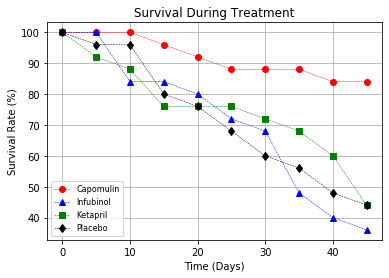

In [22]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(timepoint,mouse_reformat['Capomulin'],marker='o',color='red',label="Capomulin",linestyle='--', linewidth=0.5)
plt.errorbar(timepoint,mouse_reformat['Infubinol'],marker='^',color='blue',label="Infubinol",linestyle='--', linewidth=0.5)
plt.errorbar(timepoint,mouse_reformat['Ketapril'],marker='s',color='green',label="Ketapril",linestyle='--', linewidth=0.5)
plt.errorbar(timepoint,mouse_reformat['Placebo'],marker='d',color='black',label="Placebo",linestyle='--', linewidth=0.5)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="upperleft",prop={'size':8})

plt.grid()


# Save the Figure
plt.savefig('mouse_survival.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug
drug_change = ((tumor_mean_reformat.iloc[-1] - tumor_mean_reformat.iloc[0]) 
                    / tumor_mean_reformat.iloc[0]) * 100

# Display the data to confirm
drug_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [24]:
# Store all Relevant Percent Changes into a Tuple
percent_changes = (drug_change[0],drug_change[2],drug_change[3],drug_change[5])
percent_changes

(-19.475302667894173, 46.12347172785184, 57.028794686606076, 51.29796048315153)

In [25]:
# Splice the data between passing and failing drugs
percent_df=pd.DataFrame(percent_changes)
percent_list=percent_df[0].to_list
percent_list

<bound method IndexOpsMixin.tolist of 0   -19.475303
1    46.123472
2    57.028795
3    51.297960
Name: 0, dtype: float64>

In [26]:
passing = percent_df[0] > 0
passing

0    False
1     True
2     True
3     True
Name: 0, dtype: bool

In [27]:
failing = percent_df[0] < 0 
failing

0     True
1    False
2    False
3    False
Name: 0, dtype: bool

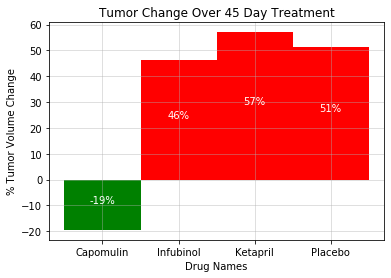

In [28]:


drugs = ["Capomulin","Infubinol","Ketapril","Placebo"]
y_axis= [(drug_change[drug])for drug in drugs]
color = passing.map({True:'red',False:'green'})

drugs_bar = plt.bar(drugs,y_axis, color=color, alpha = 1,width=1)
# Orient widths. Add labels, tick marks, etc. 

plt.grid(alpha=0.5)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug Names")
plt.ylabel("% Tumor Volume Change")

# Use functions to label the percentages of changes
for drugs in drugs_bar:
        height = drugs.get_height()
        plt.text(drugs.get_x() + drugs.get_width()/2., .5*height,
                '%d' % int(height) + '%',
                ha='center', va='bottom',color='white')

# Call functions to implement the function calls


# Save the Figure
plt.savefig('tumor_change.png')

# # Show the Figure
plt.show()